# <center>Laboratorium Całki<br>Metody Numeryczne</center>

In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.integrate as sci

# Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\sin^2(\cfrac{1}{x-1.01})dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=1$ przy pomocy następujących metod:  
    1. Metoda Prostokątów
    2. Metoda Trapezów - [trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html#scipy.integrate.trapezoid)
    3. Metoda Kwadratur - [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad)
    2. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

In [2]:
def func(x):
    return np.sin(1/(x-1.01)) ** 2

In [3]:
# Metoda Prostokątów
def rect(a, b, n):
    res = 0.0
    dx = float((b-a)/n)
    while a < b:
        res += dx * func(a)
        a += dx
    return res

In [4]:
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_r = np.zeros(len(step))
time_std_r = np.zeros(len(step))
result_r = np.zeros(len(step))

for inx, stepp in enumerate(step):
    result_r[inx] = rect(0, 1, stepp)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_r[inx])
    saved_timing = %timeit -r 5 -n 10 -o rect(0, 1, stepp)
    time_avg_r[inx] = saved_timing.average
    time_std_r[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.6990302684350905
The slowest run took 4.27 times longer than the fastest. This could mean that an intermediate result is being cached.
6.6 µs ± 4.88 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.69941546178899
30.6 µs ± 465 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.6785484841041156
295 µs ± 28.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.6755307299487198

In [5]:
# Metoda Trapezów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_t = np.zeros(len(step))
time_std_t = np.zeros(len(step))
result_t = np.zeros(len(step))

for inx, stepp in enumerate(step):
    dx = (0 - 1)/stepp
    x1 = np.linspace(0, 1, stepp)
    y1 = func(x1)
    result_t[inx] = sci.trapz(y1, x1, dx)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_t[inx])
    saved_timing = %timeit -r 5 -n 10 -o sci.trapz(y1, x1, dx)
    time_avg_t[inx] = saved_timing.average
    time_std_t[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.0
34.1 µs ± 6.42 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.7268511896084273
17.5 µs ± 5.58 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.6775930219803752
25.9 µs ± 14.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.675393284178893
78.4 µs ± 24.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
---------------------------------------------------------

In [6]:
# Metoda quad
print('------------------------------------------------------------------------------')
result_q = sci.quad(func, 0, 1)
print(f'Wartość całki obliczona przez funkcje quad: {result_q[0]}')
print(f'Dokładność obliczenia całki: {result_q[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quad(func, 0, 1)
time_avg_q = saved_timing.average
time_std_q = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quad: 0.6755141541635237
Dokładność obliczenia całki: 7.3664441581185955e-09
2.26 ms ± 324 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


In [7]:
# Metoda quadrature
print('------------------------------------------------------------------------------')
result_qe = sci.quadrature(func, 0, 1, maxiter=450)
print(f'Wartość całki obliczona przez funkcje quadrature: {result_qe[0]}')
print(f'Różnica wyników pomiędzy dwoma ostatnimi iteracjami: {result_qe[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quadrature(func, 0, 1, maxiter=450)
time_avg_qe = saved_timing.average
time_std_qe = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quadrature: 0.6755143270593817
Różnica wyników pomiędzy dwoma ostatnimi iteracjami: 1.1312934145024656e-08
20.6 ms ± 4.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


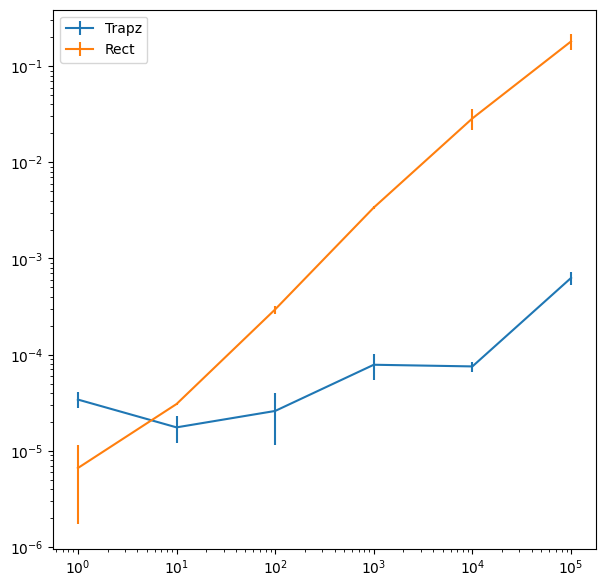

In [8]:
fig1, time = plt.subplots(figsize=(7,7))
time.errorbar(step, time_avg_t, yerr=time_std_t, label='Trapz')
time.errorbar(step, time_avg_r, yerr=time_std_r, label='Rect')
time.set(xscale='log', yscale='log')
time.legend()

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{-x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

In [9]:
def func(x):
    return np.exp(-x ** 2)

In [10]:
# Metoda Prostokątów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_r = np.zeros(len(step))
time_std_r = np.zeros(len(step))
result_r = np.zeros(len(step))

for inx, stepp in enumerate(step):
    result_r[inx] = rect(0, 1, stepp)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_r[inx])
    saved_timing = %timeit -r 5 -n 10 -o rect(0, 1, stepp)
    time_avg_r[inx] = saved_timing.average
    time_std_r[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
1.0
5.68 µs ± 1.63 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.8146047681903216
38.1 µs ± 9.15 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.7499786042621127
211 µs ± 53 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.747140131778599
1.52 ms ± 35.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------

In [11]:
# Metoda Trapezów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_t = np.zeros(len(step))
time_std_t = np.zeros(len(step))
result_t = np.zeros(len(step))

for inx, stepp in enumerate(step):
    dx = (0 - 1)/stepp
    x1 = np.linspace(0, 1, stepp)
    y1 = func(x1)
    result_t[inx] = sci.trapz(y1, x1, dx)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_t[inx])
    saved_timing = %timeit -r 5 -n 10 -o sci.trapz(y1, x1, dx)
    time_avg_t[inx] = saved_timing.average
    time_std_t[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.0
26.1 µs ± 2.72 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
0.7460668679126695
45.7 µs ± 8.73 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
0.7468178769764183
46.4 µs ± 15 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
0.7468240713763741
54.9 µs ± 32.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
----------------------------------------------------------

In [12]:
# Metoda quad
print('------------------------------------------------------------------------------')
result_q = sci.quad(func, 0, 1)
print(f'Wartość całki obliczona przez funkcje quad: {result_q[0]}')
print(f'Dokładność obliczenia całki: {result_q[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quad(func, 0, 1)
time_avg_q = saved_timing.average
time_std_q = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quad: 0.7468241328124271
Dokładność obliczenia całki: 8.291413475940725e-15
59.2 µs ± 21.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


In [13]:
# Metoda quadrature
print('------------------------------------------------------------------------------')
result_qe = sci.quadrature(func, 0, 1, maxiter=450)
print(f'Wartość całki obliczona przez funkcje quadrature: {result_qe[0]}')
print(f'Różnica wyników pomiędzy dwoma ostatnimi iteracjami: {result_qe[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quadrature(func, 0, 1, maxiter=450)
time_avg_qe = saved_timing.average
time_std_qe = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quadrature: 0.7468241328901553
Różnica wyników pomiędzy dwoma ostatnimi iteracjami: 6.123907048127819e-09
245 µs ± 85.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


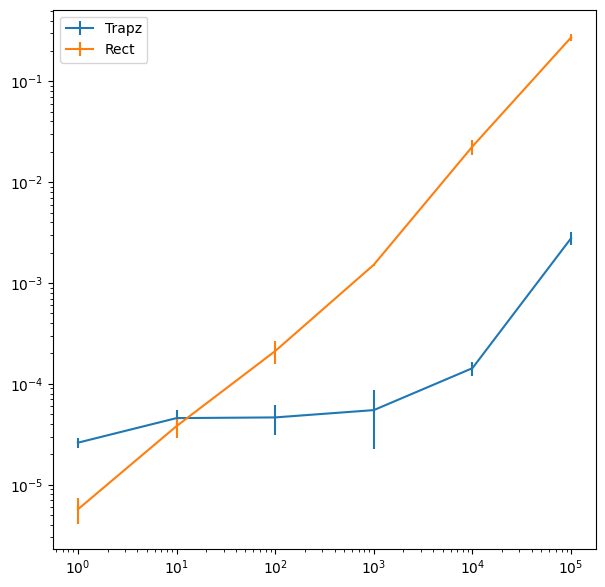

In [14]:
fig2, time = plt.subplots(figsize=(7, 7))
time.errorbar(step, time_avg_t, yerr=time_std_t, label='Trapz')
time.errorbar(step, time_avg_r, yerr=time_std_r, label='Rect')
time.set(xscale='log', yscale='log')
time.legend()

***Zadanie 3.***  
Dla funkcji 

$$f(x) = x^{x}$$

wyznacz numerycznie wartośc całki na przedziale $a = 1$, $b=2$  w  taki sam sposób jak w zadaniu 1.

In [15]:
def func(x):
    return x ** x

In [16]:
# Metoda Prostokątów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_r = np.zeros(len(step))
time_std_r = np.zeros(len(step))
result_r = np.zeros(len(step))

for inx, stepp in enumerate(step):
    result_r[inx] = rect(1, 2, stepp)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_r[inx])
    saved_timing = %timeit -r 5 -n 10 -o rect(1, 2, stepp)
    time_avg_r[inx] = saved_timing.average
    time_std_r[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
1.0
1.13 µs ± 199 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
1.9052531778355322
9.52 µs ± 3.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
2.035494339085559
49.7 µs ± 438 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
2.0529467155835412
657 µs ± 135 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
--------------------------------------------------------------

In [17]:
# Metoda Trapezów
step = [1, 10, 100, 1000, 10000, 100000]
time_avg_t = np.zeros(len(step))
time_std_t = np.zeros(len(step))
result_t = np.zeros(len(step))

for inx, stepp in enumerate(step):
    dx = (1 - 2)/stepp
    x1 = np.linspace(1, 2, stepp)
    y1 = func(x1)
    result_t[inx] = sci.trapz(y1, x1, dx)
    print('------------------------------------------------------------------------------')
    print(f'Dla n = {stepp}')
    print(result_t[inx])
    saved_timing = %timeit -r 5 -n 10 -o sci.trapz(y1, x1, dx)
    time_avg_t[inx] = saved_timing.average
    time_std_t[inx] = saved_timing.stdev
    print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Dla n = 1
0.0
26.9 µs ± 2.69 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 10
2.0563797068397416
31.3 µs ± 7.21 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 100
2.0504953157954335
19.4 µs ± 1.22 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------
------------------------------------------------------------------------------
Dla n = 1000
2.0504467165472993
The slowest run took 4.29 times longer than the fastest. This could mean that an intermediate result is being cached.
63.5 µs ±

In [18]:
# Metoda quad
print('------------------------------------------------------------------------------')
result_q = sci.quad(func, 1, 2)
print(f'Wartość całki obliczona przez funkcje quad: {result_q[0]}')
print(f'Dokładność obliczenia całki: {result_q[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quad(func, 1, 2)
time_avg_q = saved_timing.average
time_std_q = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quad: 2.050446234534731
Dokładność obliczenia całki: 2.2764526203364124e-14
20.5 µs ± 6.55 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


In [19]:
# Metoda quadrature
print('------------------------------------------------------------------------------')
result_qe = sci.quadrature(func, 1, 2, maxiter=450)
print(f'Wartość całki obliczona przez funkcje quadrature: {result_qe[0]}')
print(f'Różnica wyników pomiędzy dwoma ostatnimi iteracjami: {result_qe[1]}')
saved_timing = %timeit -r 5 -n 10 -o sci.quadrature(func, 1, 2, maxiter=450)
time_avg_qe = saved_timing.average
time_std_qe = saved_timing.stdev
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------------
Wartość całki obliczona przez funkcje quadrature: 2.0504462345169436
Różnica wyników pomiędzy dwoma ostatnimi iteracjami: 2.317523062345117e-09
350 µs ± 74.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------------------------------------------------------


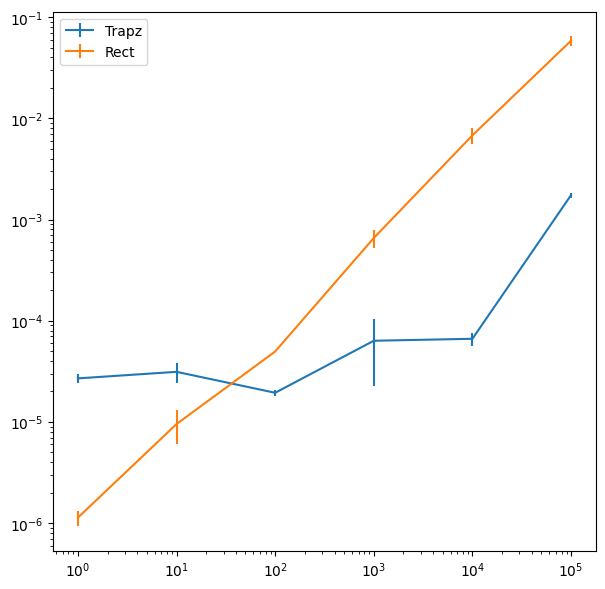

In [20]:
fig3, time = plt.subplots(figsize=(7, 7))
time.errorbar(step, time_avg_t, yerr=time_std_t, label='Trapz')
time.errorbar(step, time_avg_r, yerr=time_std_r, label='Rect')
time.set(xscale='log', yscale='log')
time.legend()

**Wnioski:**

Całkowanie numeryczne jest dobrą metodą na przybliżenie faktycznego wyniku całki oznaczonej, jednak nie daje nam ono stu procentowej dokładności. Algorytm całkowania poprzez metodę prostokątów jest zarazem najszybszy jak i najmniej dokładny, ale po wybraniu dostatecznie małego kroku dx osiąga on według mnie wystarczającą dokładność. Pozostałe algorytmy są coraz bardziej dokładne, ale równocześnie czas ich wykonania rośnie. Czas wykonania metody prostokątów i trapezów w pewnym momecie przekracza czas wykonania metod quad i quadrature przy podobnej dokładności. Z czego wynika że ich stosowanie jest odpowiednie, kiedy zależy nam na dokładnym wyniku.